<a href="https://colab.research.google.com/github/thilinadj/Deep-Learning-CW2/blob/kirthika/image_classifcation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [5]:
device = torch.device('cuda')

In [5]:
if torch.cuda.is_available(): 
 dev = "cpu" 
else: 
 dev = "cuda:0" 
device = torch.device(dev)

In [6]:
device

device(type='cpu')

In [7]:
!pip install -q datasets transformers

     |████████████████████████████████| 451 kB 4.5 MB/s 
     |████████████████████████████████| 5.8 MB 71.6 MB/s 
     |████████████████████████████████| 132 kB 68.5 MB/s 
     |████████████████████████████████| 182 kB 68.6 MB/s 
     |████████████████████████████████| 212 kB 68.5 MB/s 
     |████████████████████████████████| 127 kB 75.3 MB/s 
     |████████████████████████████████| 7.6 MB 45.5 MB/s 


In [8]:
from datasets import load_dataset 

dataset = load_dataset("fashion_mnist")

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #3:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #2:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
from datasets import load_metric

metric = load_metric("accuracy")

<ipython-input-9-350fcae91df9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
example=dataset["train"][0]

In [ ]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [ ]:
example['image']

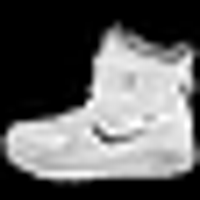

In [ ]:
example['image'].resize((200, 200))

In [ ]:
example['label']

9

In [ ]:
dataset["train"].features["label"]

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [11]:
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'Pullover'

In [12]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
feature_extractor

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [13]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
_transforms = Compose([RandomResizedCrop((224,224)), ToTensor(), normalize])

In [14]:
def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

In [15]:
dataset = dataset.with_transform(transforms)

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
dataset['train'][0]

{'label': 9, 'pixel_values': tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]])}

In [17]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [18]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes = True,
)

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device(dev)

In [20]:
device

device(type='cuda', index=0)

In [21]:
model_checkpoint='google/vit-base-patch16-224-in21k'
batch_size = 16

In [22]:
# training_args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=16,
#     evaluation_strategy="steps",
#     num_train_epochs=4,
#     fp16=True,
#     save_steps=100,
#     eval_steps=100,
#     logging_steps=10,
#     learning_rate=2e-4,
#     save_total_limit=2,
#     remove_unused_columns=False,
# )

training_args = TrainingArguments(
    output_dir="./results",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)



In [23]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [24]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)




In [25]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 60000
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 4
  Total optimization steps = 937
  Number of trainable parameters = 85806346


Epoch,Training Loss,Validation Loss,Accuracy
0,0.429200,0.453666,0.860200


***** Running Evaluation *****
  Num examples = 10000
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-937
Configuration saved in ./results/checkpoint-937/config.json
Model weights saved in ./results/checkpoint-937/pytorch_model.bin
Image processor saved in ./results/checkpoint-937/preprocessor_config.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-937 (score: 0.8602).
Saving model checkpoint to ./results
Configuration saved in ./results/config.json
Model weights saved in ./results/pytorch_model.bin
Image processor saved in ./results/preprocessor_config.json


***** train metrics *****
  epoch                    =          1.0
  total_flos               = 4328203231GF
  train_loss               =       0.7114
  train_runtime            =   0:35:26.31
  train_samples_per_second =       28.218
  train_steps_per_second   =        0.441


In [26]:
metrics = trainer.evaluate()
# some nice to haves:
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 10000
  Batch size = 16


***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.8574
  eval_loss               =     0.4644
  eval_runtime            = 0:02:20.27
  eval_samples_per_second =     71.286
  eval_steps_per_second   =      4.455


In [30]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "./results/checkpoint-937"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
my_model = AutoModelForImageClassification.from_pretrained(repo_name)

loading configuration file ./results/checkpoint-937/preprocessor_config.json
loading configuration file ./results/checkpoint-937/config.json
Model config ViTConfig {
  "_name_or_path": "./results/checkpoint-937",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "T - shirt / top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Ankle boot": 9,
    "Bag": 8,
    "Coat": 4,
    "Dress": 3,
    "Pullover": 2,
    "Sandal": 5,
    "Shirt": 6,
    "Sneaker": 7,
    "T - shirt / top": 0,
    "Trouser": 1
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_chann

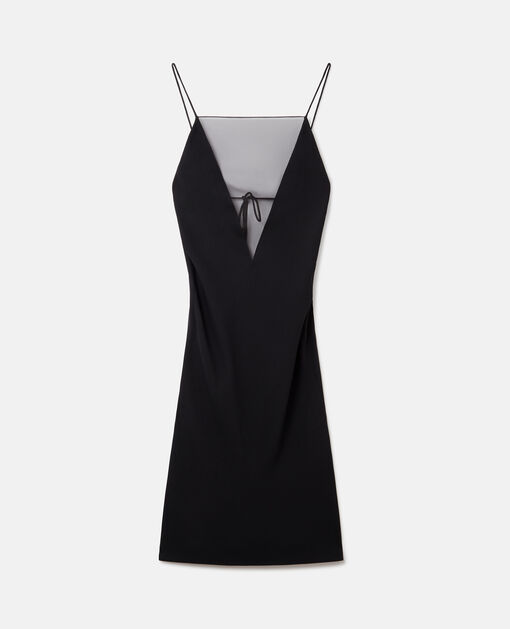

In [33]:
from PIL import Image
import requests

url = 'https://www.stellamccartney.com/dw/image/v2/BCWD_PRD/on/demandware.static/-/Sites-master_catalog/default/dw592a38e0/Assets/6A01573AU3541000_C/large/b/b/7/1/bb71d8d8501a9452202d3f7f73ebb1e44ef74866_6A01573AU3541000_C.jpg?sw=510&sh=629'
image = Image.open(requests.get(url, stream=True).raw)
image

In [34]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [35]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [36]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Shirt


In [40]:
# upload external file before import
from google.colab import files


In [37]:
if torch.cuda.is_available(): 
 dev = "cpu" 
else: 
 dev = "cuda:0" 
device = torch.device(dev)

In [38]:
device

device(type='cpu')

In [42]:
!zip -r /content/file.zip /content/results/checkpoint-937

  adding: content/results/checkpoint-937/ (stored 0%)
  adding: content/results/checkpoint-937/pytorch_model.bin (deflated 7%)
  adding: content/results/checkpoint-937/trainer_state.json (deflated 82%)
  adding: content/results/checkpoint-937/preprocessor_config.json (deflated 47%)
  adding: content/results/checkpoint-937/config.json (deflated 52%)
  adding: content/results/checkpoint-937/scheduler.pt (deflated 50%)
  adding: content/results/checkpoint-937/training_args.bin (deflated 48%)
  adding: content/results/checkpoint-937/rng_state.pth (deflated 28%)
  adding: content/results/checkpoint-937/optimizer.pt (deflated 8%)


In [43]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# my_model = torch.load('checkpoint_model.pth', map_location=torch.device('cpu'))
